## Clasification and Regression Trees from scratch

Here we will build a classic decision tree from scratch

This requires first being able to split data using the GINI index from before:

In [16]:
#First our standard packages
import pandas as pd
import numpy as np
import math
import random
from matplotlib import pyplot as plt

In [77]:
#lets first create our data from the lecture
G1 = ["Group1"] * 100

In [82]:
G1[0], len(G1)

('Group1', 100)

In [76]:
G2 = ['Group2'] * 100

In [83]:
G2[0], len(G2)

('Group2', 100)

In [14]:
#these are just arays of which group they are in so maybe we should make it a real dataset

In [31]:
X1 = np.array([random.gauss(-5,1) for _ in range(100)])

In [20]:
Y1 = np.array([random.gauss(0,5) for _ in range(100)])

In [33]:
X2 = np.array([random.gauss(5,1) for _ in range(100)])

In [23]:
Y2 = np.array([random.gauss(0,5) for _ in range(100)])

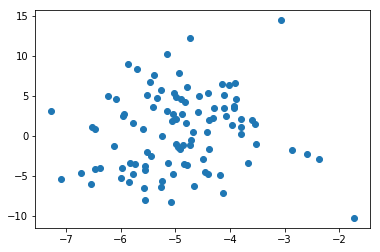

In [35]:
plt.scatter(X1,Y1)

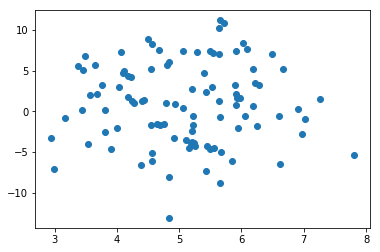

In [37]:
plt.scatter(X2,Y2)

In [84]:
Group1 = pd.DataFrame({'X' : X1, 'Y' : Y1, 'Group' : G1})

In [85]:
Group1.head()

,X,Y,Group
0,-4.560652,5.031129,Group1
1,-5.056226,1.869162,Group1
2,-4.901097,4.658226,Group1
3,-6.727258,-4.607674,Group1
4,-3.602779,1.928465,Group1


In [86]:
Group2 = pd.DataFrame({'X' : X2, 'Y' : Y2, 'Group' : G2})

In [87]:
Group2.head()

,X,Y,Group
0,4.233641,4.194389,Group2
1,5.056342,7.392928,Group2
2,4.434529,1.361793,Group2
3,4.829293,-8.104180,Group2
4,4.379224,-6.523490,Group2


In [88]:
#ok now we have two sets of data we should be able to understand splitting more clearly lets make the one for visualisation
FullDat = pd.concat([Group1,Group2])

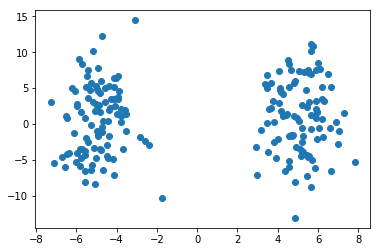

In [95]:
#Here we can see very clearly our different groups with the data
plt.scatter(FullDat['X'],FullDat['Y'])

So we want to put a split at 0 on the X axis to get a perfect split from what we see but how do we go about splitting them and then testing the GINI score?

In [98]:
#While this is redundant as we actually have a split lets do it manually at a point
SplitLeft = FullDat[FullDat['X'] < 0]

In [101]:
SplitLeft.head()

,X,Y,Group
0,-4.560652,5.031129,Group1
1,-5.056226,1.869162,Group1
2,-4.901097,4.658226,Group1
3,-6.727258,-4.607674,Group1
4,-3.602779,1.928465,Group1


In [102]:
SplitRight = FullDat[FullDat['X'] > 0]

In [103]:
SplitRight.head()

,X,Y,Group
0,4.233641,4.194389,Group2
1,5.056342,7.392928,Group2
2,4.434529,1.361793,Group2
3,4.829293,-8.104180,Group2
4,4.379224,-6.523490,Group2


In [131]:
#now we have our split we need to work out the GINI score, which is based on the proportion of correct/total and missclasifications
LeftCounts = SplitLeft['Group'].value_counts().index.tolist(),SplitLeft['Group'].value_counts().tolist()


In [168]:
LeftCounts

[['Group1'], [100]]

In [133]:
RightCounts = SplitRight['Group'].value_counts().index.tolist(),SplitRight['Group'].value_counts().tolist()

In [138]:
RightCounts

(['Group2'], [100])

In [140]:
#Ok now we have our proportions we need to work out our gini which is 1-Sum(proportion^2)
G1PropCorrect = LeftCounts[1][0] / LeftCounts[1][0]
G1PropIncorrect = 0/LeftCounts[1][0] 


In [141]:
G1GINI = 1- (G1PropCorrect**2 + G1PropIncorrect**2)

In [143]:
G1GINI

0.0

In [144]:
G2PropCorrect = RightCounts[1][0] / RightCounts[1][0]
G2PropIncorrect = 0/RightCounts[1][0] 

In [145]:
G2GINI = 1- (G2PropCorrect**2 + G2PropIncorrect**2)

In [146]:
G2GINI

0.0

In [147]:
GINI = G1GINI + G2GINI

In [148]:
GINI

0.0

And there we go we have our GINI score for a split at the X = 0 which is a perfect split however that was a long winded way to do it so lets build two functions, one that calculates the GINI score and one that finds the best split

In [161]:
#this function will calculate the GINI score it takes the two sides of the split and the name of the classifier column it is a quick and dirtyu way to do it for qny number of groupsgroups
def Calc_gini(Left,Right,Class):
    
    LeftCounts = np.array(Left[Class].value_counts().tolist())
    LeftProps = LeftCounts / sum(LeftCounts)
    
    RightCounts = np.array(Right[Class].value_counts().tolist())
    RightProps = RightCounts /sum(RightCounts)
    
    GiniLeft = 1-sum(LeftProps**2)
    GiniRight = 1-sum(RightProps**2)
    
    return GiniLeft + GiniRight

In [189]:
Calc_gini(SplitLeft,SplitRight,"Group")

0.0

In [190]:
#now we will just create a quick function that splits a dataframe
def Create_split(Data,Column,SplitPoint):
    SplitLeft = Data[Data[Column] < SplitPoint]
    SplitRight = Data[Data[Column] > SplitPoint]
    return SplitLeft, SplitRight

In [191]:
Left,Right = Create_split(FullDat,'X',0)

In [192]:
Left.head()

,X,Y,Group
0,-4.560652,5.031129,Group1
1,-5.056226,1.869162,Group1
2,-4.901097,4.658226,Group1
3,-6.727258,-4.607674,Group1
4,-3.602779,1.928465,Group1


In [199]:
#now the overall function that will find the best split.
def find_split(Data,Column,Class):
    #first things first set a best score to be 1 and an empty best split
    BestScore = 1
    BestSplit = []
    #next we will loop through all values of the data and calculate the gini score for that split
    for i in sorted(Data[Column]):
        Left,Right = Create_split(Data,Column,i)
        CurrentGini = Calc_gini(Left,Right,Class)
        #if our current score is better than the current best replace it and set that value to be the split point.
        if CurrentGini < BestScore:
            BestScore = CurrentGini
            BestSplit = i
    return BestScore, BestSplit
    

In [198]:
find_split(FullDat,'X','Group')

(0.0, -1.7266404676040579)

Right so we have built a function that given input data will find the best split point. This is the fundemental part of the algorithm now we just have to write the functions that will build the tree itself